UFCG/CEEI/DEE - Campus de Campina Grande - Disciplina: Controle Analógico

Terceira avaliação - Atividade 1 - Período: 2021.1 - Professor: Saulo O. D. Luiz

Nome:

Matrícula:

Caros alunos e alunas,

Crie uma cópia deste notebook do colab por meio do menu Arquivo / Salvar uma cópia no Drive, e inclua seu nome e matrícula no nome do notebook.

Os itens identificados como (Cálculos à mão) devem ser respondidos à mão no papel ou mesa digitalizadora. É possível anexar a imagem digitalizada neste notebook do colab, ou fazer upload de um pdf na atividade. Por favor não anexem jpg ou png.

Os demais itens podem ser respondidos na forma de código no Python, resultados de cálculos e simulações nas células identificadas como (#Resposta), e texto nas células identificadas como (Resposta) neste notebook do colab.

Realize upload do notebook como arquivo do seu Drive. Por favor, não faça upload do link do arquivo.

Boa sorte!

In [2]:
pip install control #Instalação da biblioteca de sistemas de controle do Python

     |████████████████████████████████| 357 kB 3.2 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364703 sha256=9df15c00baf614f5060e07a6699a2e89b054c8b69acd9e189a81682b206a4dbf
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


O sistema de controle de posicionamento de um satélite é ilustrado na Figura 1, em que $\theta(s)$ é o ângulo do satélite, $R(s)$ é a entrada de referência, $J =1 \cdot 10^2 kg \cdot m^2$ é o momento de inércia do satélite, $p_d$, $K_p$ e $K_d$ são parâmetros de um controlador.

(a) (1.5 ponto) (Cálculos à mão) Determine as condições (inequações) de $p_d$, $K_p$ e $K_d$ para que o sistema de controle seja estável.

(b) (0.5 ponto) Realize a simulação do sistema de controle para duas possíves combinações de valores de $p_d$, $K_p$ e $K_d$: a primeira satisfazendo as condições (inequações) de $p_d$, $K_p$ e $K_d$ para que o sistema de controle seja estável; e a segunda não satisfazendo as condições (inequações) de $p_d$, $K_p$ e $K_d$ para que o sistema de controle seja estável. Apresente a saída no tempo correspondente à resposta ao degrau unitário na referência, e o diagrama de polos e zeros da malha fechada no plano complexo para a combinação de valores de $p_d$, $K_p$ e $K_d$.

(c) (0.5 ponto) Discuta os resultados das simulações apresentados no item (b), relacionando as combinações de valores de $p_d$, $K_p$ e $K_d$ às posições dos polos da malha fechada no plano complexo e a resposta ao degrau.

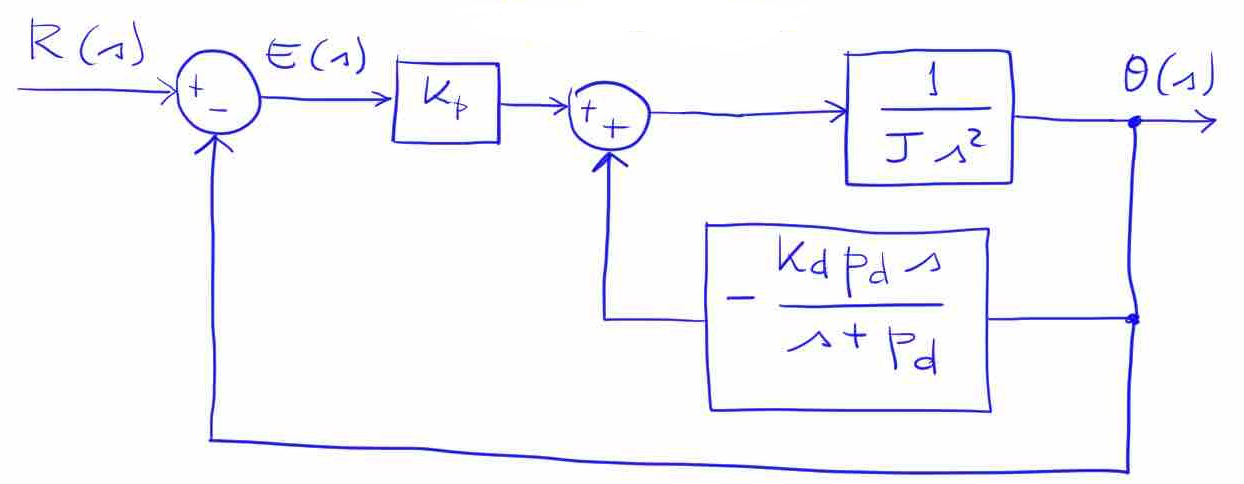 
Figura 1: diagrama de blocos do sistema de controle de posicionamento de um satélite.

# 1)

In [5]:
#Resposta Letra A
#Encontramos nos calculos que para o sistema ser estável
#kp*pd > 0
#kd*pd > 0
#Em anexo


 O valor de H(s) =  
          s + 1
-------------------------
100 s^3 + 100 s^2 + 100 s


 O valor do ramo principal, H_serie =  
       100 s + 100
-------------------------
100 s^3 + 100 s^2 + 100 s


 A FTMF é =  
          100 s + 100
-------------------------------
100 s^3 + 100 s^2 + 200 s + 100


 Zeros do sistema: [-1.]

 Polos do sistema: [-0.21507985+1.30714128j -0.21507985-1.30714128j -0.56984029+0.j        ] 



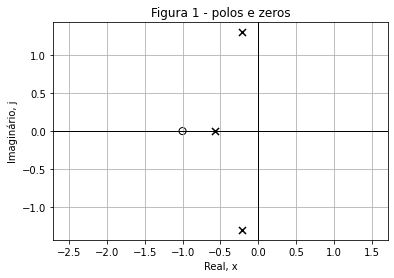

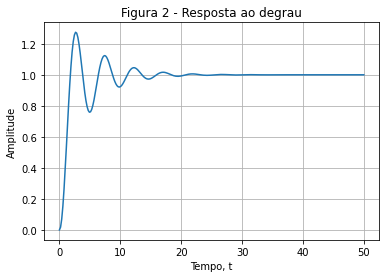

In [31]:
#Resposta Letra B
import numpy as np
from control.matlab import *
import matplotlib.pyplot as plt
import cmath
import math

#Parâmetros escolhidos por mim
kp = 100
kd = 100
pd = 1
J = 100

s = tf('s')

A = 1 / (J*s**2)
B = (-kp*pd*s) / (s+pd)
H = feedback(A, B, sign=1) #Realimentação positiva da figura
print('\n O valor de H(s) = ',H)

H_serie = series(kp,H)
print('\n O valor do ramo principal, H_serie = ', H_serie)

#Função de Transferência de Malha Fechada
FTMF = feedback(H_serie, 1, sign=-1)
print('\n A FTMF é = ', FTMF)

print('\n Zeros do sistema:', zero(FTMF))
print('\n Polos do sistema:', pole(FTMF), '\n')

plt.figure(1)
p, z = pzmap(FTMF)
plt.title('Figura 1 - polos e zeros')
plt.xlabel('Real, x') 
plt.ylabel('Imaginário, j')
plt.grid(True)
plt.show()

y1,t1 = step(FTMF, T=50)
plt.figure(2)
plt.plot(t1,y1) 
plt.title('Figura 2 - Resposta ao degrau')
plt.xlabel('Tempo, t') 
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()




 Zeros do sistema: [1.]

 Polos do sistema: [ 1.46557123+0.j         -0.23278562+0.79255199j -0.23278562-0.79255199j] 



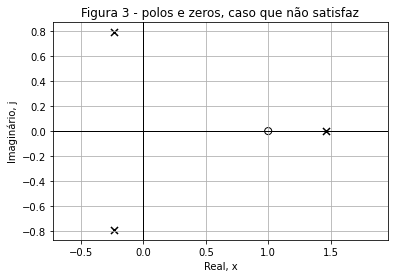

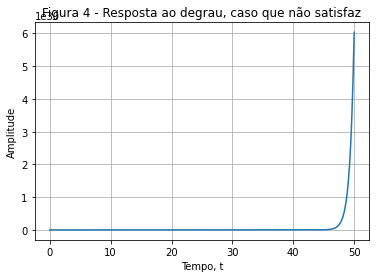

In [26]:
#Resposta Letra B - Continuação
#Agora vamos escolher valores que NÃO SATISFAZEM
#Vou escolher um pd negativo
import numpy as np
from control.matlab import *
import matplotlib.pyplot as plt
import cmath
import math

#Parâmetros escolhidos por mim
kp = 100
kd = 100
pd = -1
J = 100

s = tf('s')

A = 1 / (J*s**2)
B = (-kp*pd*s) / (s+pd)
H = feedback(A, B, sign=1) #Realimentação positiva da figura

H_serie = series(kp,H)

#Função de Transferência de Malha Fechada
FTMF = feedback(H_serie, 1, sign=-1) 

print('\n Zeros do sistema:', zero(FTMF))
print('\n Polos do sistema:', pole(FTMF), '\n')

plt.figure(3)
p, z = pzmap(FTMF)
plt.title('Figura 3 - polos e zeros, caso que não satisfaz')
plt.xlabel('Real, x') 
plt.ylabel('Imaginário, j')
plt.grid(True)
plt.show()

y1,t1 = step(FTMF, T=50)
plt.figure(4)
plt.plot(t1,y1) 
plt.title('Figura 4 - Resposta ao degrau, caso que não satisfaz')
plt.xlabel('Tempo, t') 
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


**LETRA C**

Sobre os resultados obtidos a condição para ter um sistema estável foi utilizar valores de $pd$, $kp$ e $kd$ positivos. Obtidos na análise teórica da folha em anexo com o auxílio de Routh-Hurwitz.
Ao plotar o pzmap vemos que os polos e zeros se encontram do lado esquerdo, confirmando sua estabilidade.

Percebi que ao alterar o valor de $pd$ para um valor negativo, o sistema se torna instável, é possíver ver que agora existem valores no plano direito do pzmap. Além disso sua resposta tende ao infinito quando chega próximo dos 50 segundos.